In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#reading in the datasets to be used fot this visualization
production_data = pd.read_csv('Africa Food Production (2004 - 2013).csv')
supply_data = pd.read_csv('Africa Food Supply (2004 - 2013).csv')

In [3]:
#Getting the top 5 rows in the food production dataset
production_data.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
#Getting the top 5 rows in the food supply dataset
supply_data.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [5]:
production_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [6]:
supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


Text(0.5, 1.0, '')

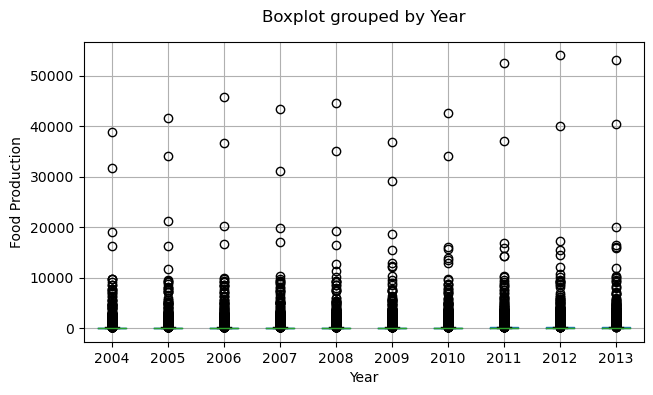

In [7]:
#getting the average & median food production including outliers for the various years using boxplot 
ax = production_data.boxplot(column='Value', by='Year',figsize=(7,4))
ax.set_ylabel('Food Production')
ax.set_title('')

Text(0.5, 1.0, '')

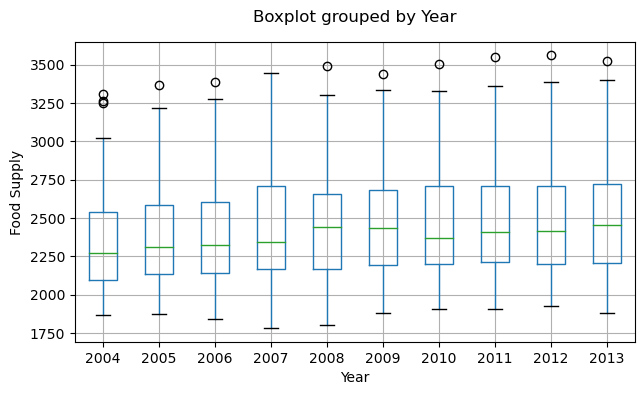

In [8]:
#getting the average & median food supply including outliers for the various years using boxplot 
ax = supply_data.boxplot(column='Value', by='Year',figsize=(7,4))
ax.set_ylabel('Food Supply')
ax.set_title('')

In [9]:
#Grouping countries by food production and sorting in descending order
df = production_data.groupby(['Country'],as_index = False)['Value'].sum()
df = df.sort_values('Value', ascending = False)


Text(0, 0.5, 'Country')

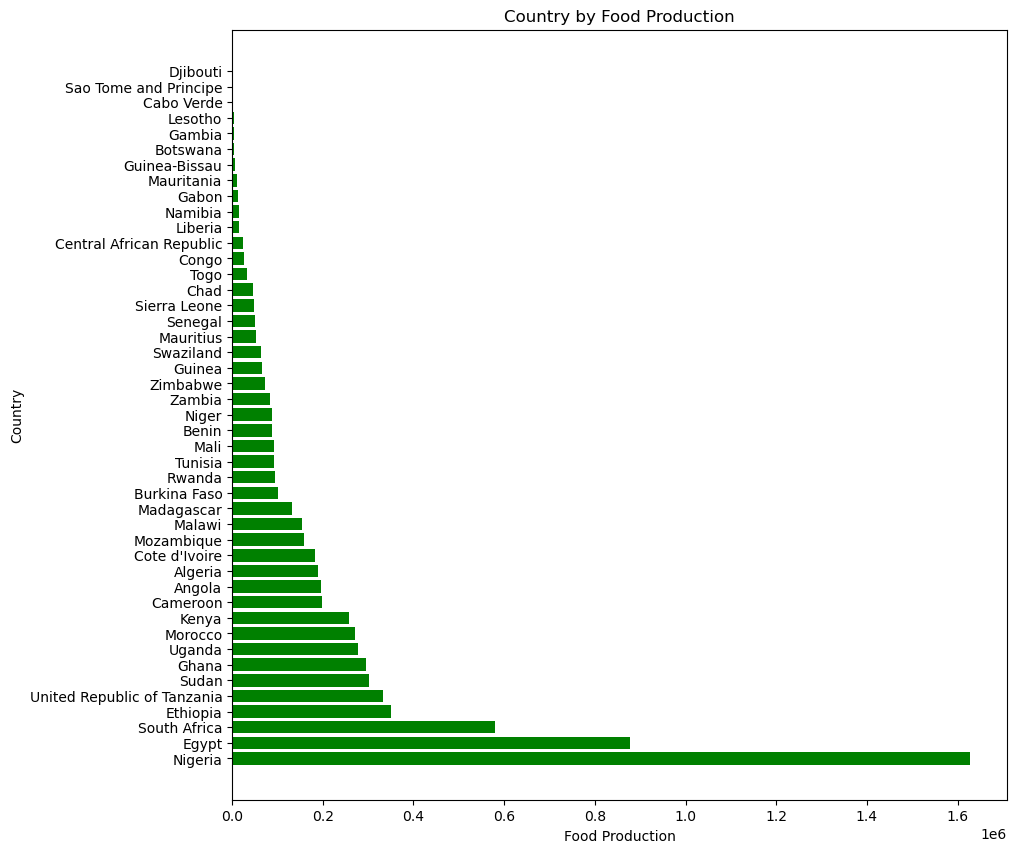

In [10]:
#visualizing to get countries by production
fig = plt.figure(figsize = (10, 10))
plt.barh(df["Country"], df["Value"] ,color ='green')
plt.title("Country by Food Production")
plt.xlabel("Food Production")
plt.ylabel("Country")

In [11]:
#getting the top 20 items by food production 
Ef = production_data.groupby(['Item'],as_index = False)['Value'].sum()
Ef = Ef.sort_values('Value', ascending = False)[0:20]

In [12]:
Ef.head(10)

,Item,Value
12,Cassava and products,1118948
82,Sugar cane,887008
40,Maize and products,574948
93,Yams,511523
90,"Vegetables, Other",410403
43,Milk - Excluding Butter,380380
76,Sorghum and products,241080
91,Wheat and products,229875
9,"Beverages, Fermented",227037
66,Potatoes and products,221092


Text(0, 0.5, 'Food Item')

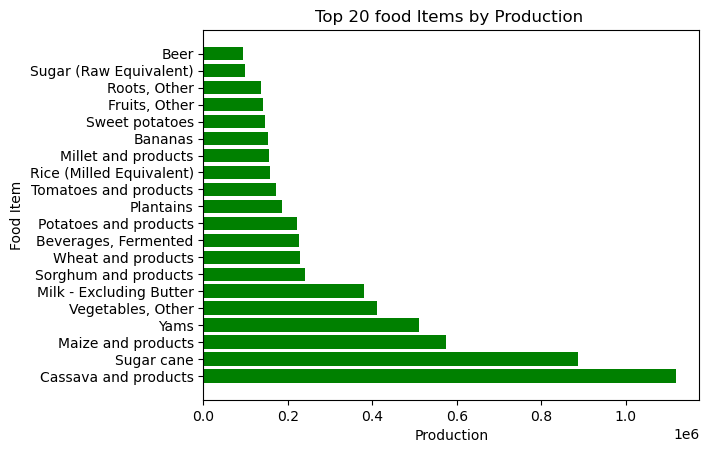

In [13]:
#Visualizing the top 20 products by food production
plt.barh(Ef["Item"], Ef["Value"] ,color ='green')
plt.title("Top 20 food Items by Production ")
plt.xlabel("Production")
plt.ylabel("Food Item")

In [14]:
#Grouping food production by year
Gf = production_data.groupby(['Year'],as_index = False)['Value'].sum()

In [15]:
Gf

,Year,Value
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804
5,2009,746870
6,2010,786466
7,2011,812214
8,2012,841667
9,2013,872571


Text(0.5, 1.0, 'Food Production by Year')

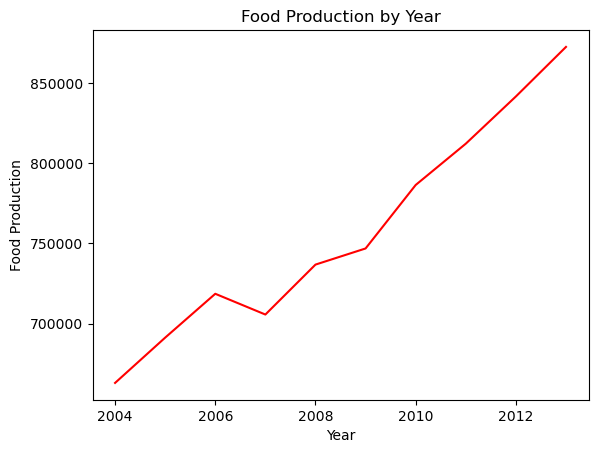

In [16]:
#Visualizing production by year
plt.plot(Gf['Year'], Gf['Value'], color = 'red' )
plt.xlabel('Year')
plt.ylabel('Food Production')
plt.title('Food Production by Year')


In [17]:
#Grouping countries by food supply
hf = supply_data.groupby(['Country'],as_index = False)['Value'].sum()
hf = hf.sort_values('Value', ascending = False)

hf.head(10)

,Country,Value
12,Egypt,34580
40,Tunisia,33055
27,Morocco,32967
0,Algeria,31118
26,Mauritius,30543
36,South Africa,29629
16,Ghana,29180
10,Cote d'Ivoire,27666
24,Mali,27502
25,Mauritania,27443


Text(0, 0.5, 'Food Supply')

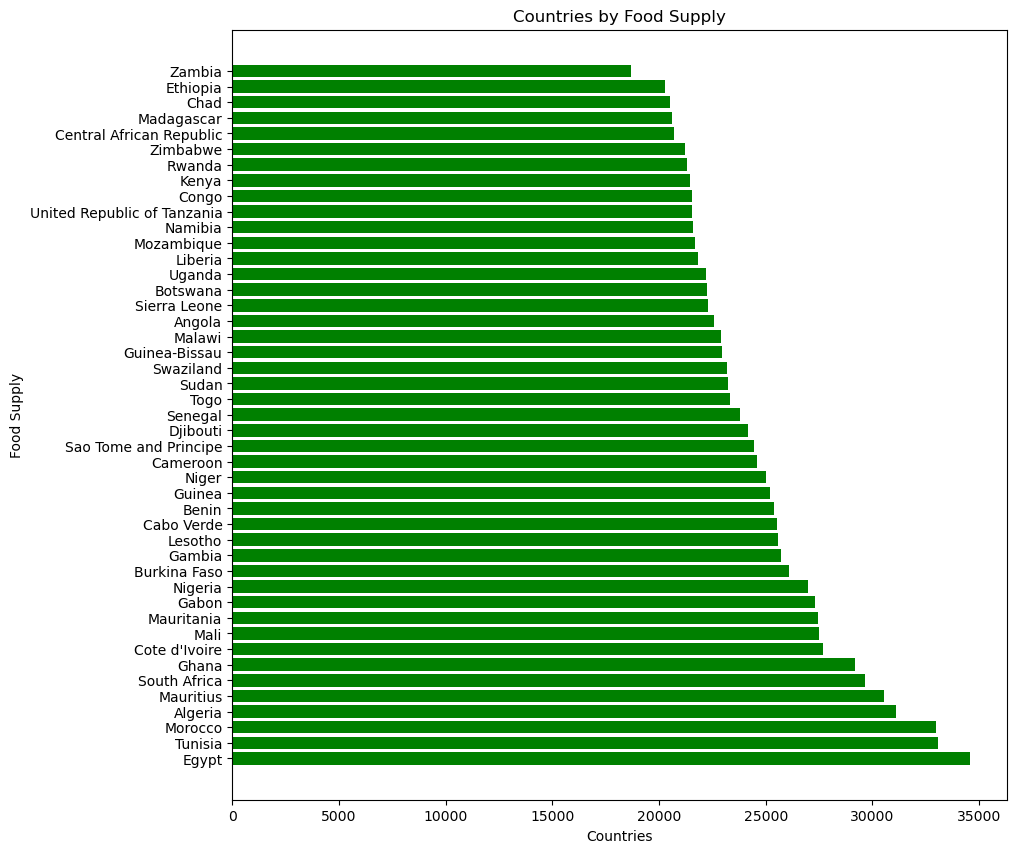

In [18]:
#visualizing countries by food supply
fig = plt.figure(figsize = (10, 10))
plt.barh(hf["Country"], hf["Value"] ,color ='green')
plt.title("Countries by Food Supply")
plt.xlabel("Countries")
plt.ylabel("Food Supply")

In [19]:
#grouping food supply by years
kf = supply_data.groupby(['Year'],as_index = False)['Value'].sum()

Text(0.5, 1.0, 'Food supply by Year')

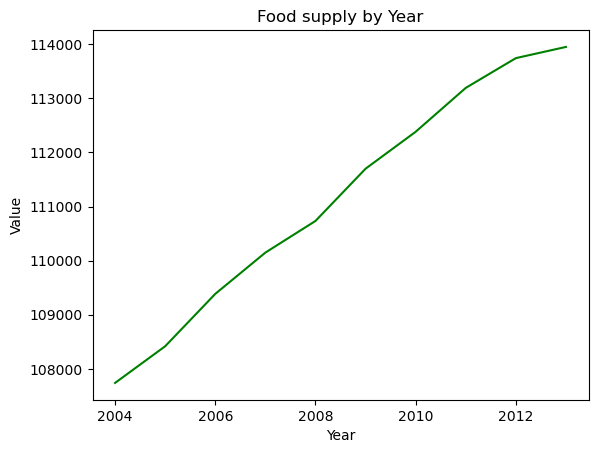

In [20]:
#visualizing food supply by years
plt.plot(kf['Year'], kf['Value'], color = 'green' )
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Food supply by Year')


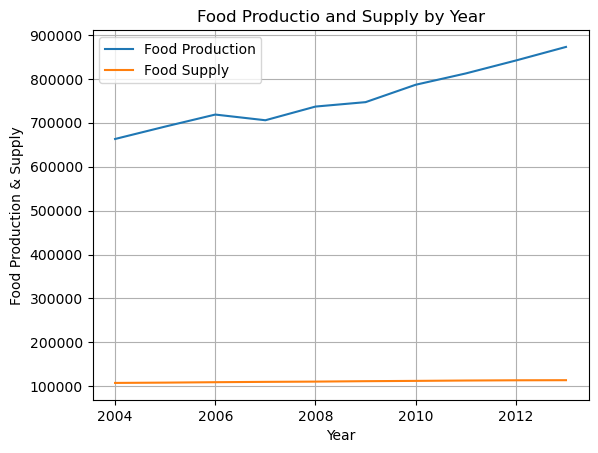

In [21]:
#Comparing food production and supply
plt.plot(Gf['Year'], Gf['Value'], label='Food Production')
plt.plot(kf['Year'], kf['Value'], label='Food Supply')
plt.xlabel('Year')
plt.ylabel('Food Production & Supply')
plt.title('Food Productio and Supply by Year')
plt.grid()
plt.legend()
